In [637]:
import tensorflow.keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
import pandas as pd
import time

In [638]:
motivational='''
The first and greatest victory is to conquer self Don’t stop until you’re proud.

Life shrinks or expands in proportion to one’s courage. Upgrade your conviction to match your destiny.

Tough times don’t last. Tough people do. It is during the hard times when the ‘hero’ within us is revealed.

Our greatest glory is not in never falling, but in rising every time we fall. As long as the mind can envision the fact that you can do something, you can do it, as long as you really believe 100 percent.

Don’t try to be perfect. Quitting lasts forever.

Set a goal so large that you can’t achieve it until you grow into the person who can. Think about what might go right.

The universe is a process. Try to be better than you were yesterday.

Remember it’s just a bad day, not a bad life. Take a deep breath, stay positive and know that things will get better.

The only person you are destined to become is the person you decide to be. Work hard, stay consistent, and be patient.

Courage is one step ahead of fear. Upgrade your conviction to match your destiny. 

The path to success is to take massive, determined actions. When you face your struggles, you overcome them.

Don’t think about what might go wrong. Be so good they can’t ignore you.

The mind is the limit. Work hard, stay consistent, and be patient.

Goals may give focus, but dreams give power. You can be anything you want to be, do anything you set out to accomplish if you hold to that desire with singleness of purpose.

Use what you have. Never give up

Make the most of yourself….for that is all there is of you. You have to memorize to be disciplined.

The pain you feel today will be the strength you feel tomorrow. Willing is not enough; we must do.

Keep going Try to be better than you were yesterday.

Don’t downgrade your dream just to fit your reality. Work hard, stay consistent, and be patient.

The future belongs to those who believe in the beauty of their dreams. Nothing can be done without hope and confidence. 
'''
motivational=motivational.lower()
motivational=motivational.split('\n')
motivational=list(set(motivational))
motivational.remove('')

In [639]:
demotivational='''Sex is mathematics. Individuality no longer an issue. What does intelligence signify? Define reason. Desire - meaningless. Intellect is not a cure. Justice is dead.
Just imagine how terrible it might have been if we’d been at all competent.
When you wish upon a falling star, your dreams can come true. Unless it's really a meteor hurtling to the Earth which will destroy all life. Then you're pretty much hosed no matter what you wish for. Unless it's death by meteorite.
There are no stupid questions, but there are a LOT of inquisitive idiots.
Nothing says "you're a loser" more than owning a motivational poster about being a winner.
Accept that you're just a product, not a gift.
Teach every child you meet the importance of forgiveness. It's our only hope of surviving their wrath once they realize just how badly we've screwed things up for them.
The United States was a big country where everybody wore funny t-shirts and ate too much.
You have to make the good out of the bad because that is all you have got to make it out of.
You can do anything you set your mind to when you have vision, determination, and an endless supply of expendable labor.
Happy people do not wake up for breakfast.
Life is only logical, and to think it's a gift is depressing.
Try & try until you cannot succeed.
Every dead body on Mount Everest was once a highly motivated person. Stay lazy my friends. It may save your life one day.
Furthermore, having lost faith in himself, he thought it his duty to undermine the nation's faith in itself.
If you're not a part of the solution, there's good money to be made in prolonging the problem.
The first step towards failure is trying.
Those who doubt your ability probably have a valid reason.
The best things in life are actually really expensive.
Dream is the only way for you to escape the miserable reality of your life.'''
demotivational=demotivational.lower()
demotivational=demotivational.split('\n')

In [640]:
tokenizer = RegexpTokenizer(r'\w+')
stopWords = set(stopwords.words('english'))

In [641]:
for i in range(len(motivational)):
    motivational[i]=tokenizer.tokenize(motivational[i])
    demotivational[i]=tokenizer.tokenize(demotivational[i])

In [642]:
demot=[]
mot=[]
for i in motivational:
    tempmot=[]
    for j in i:
        if j not in stopWords:
            tempmot.append(j)
    mot.append(tempmot)
for i in demotivational:
    tempdemot=[]
    for j in i:
        if j not in stopWords:
            tempdemot.append(j)
    demot.append(tempdemot)

In [643]:
for i in range(len(mot)):
    mot[i] = nltk.FreqDist(mot[i])
for i in range(len(demot)):
    demot[i] = nltk.FreqDist(demot[i])

In [644]:
df1=pd.DataFrame.from_dict(mot)
df1['class']=0
df2=pd.DataFrame.from_dict(demot)
df2['class']=1

In [645]:
final=pd.concat([df1,df2])


In [646]:
final=final.fillna(0.0)

In [647]:
final.tail()

,goals,may,give,focus,dreams,power,anything,want,set,accomplish,...,doubt,ability,probably,valid,best,actually,expensive,way,escape,miserable
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [648]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final.drop('class',axis=1)
                                                    , pd.get_dummies(final['class']), test_size=0.20, random_state=42)

In [649]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [650]:
nodes=[8, 16, 32, 64,  128,  256,  512,1024]
timesnodes=[]
trainaccnodes=[]
testaccnodes=[]
layers=[2,3,4,5]
timeslayers=[]
trainacclayers=[]
testacclayers=[]

# 8 nodes

In [651]:
model=Sequential()
model.add(Dense(8,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

In [652]:
model.summary()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 32, 8)             1976      
_________________________________________________________________
dense_122 (Dense)            (None, 32, 2)             18        
Total params: 1,994
Trainable params: 1,994
Non-trainable params: 0
_________________________________________________________________


In [653]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timesnodes.append(time.time()-t)

2020-09-08 00:35:14,067 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_121_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


Epoch 1/100


2020-09-08 00:35:14,214 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_121_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


1/1 [==============================] - 0s 16ms/step - loss: 0.8453 - accuracy: 0.5312
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 0.8412 - accuracy: 0.5312
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 0.8371 - accuracy: 0.5312
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 0.8331 - accuracy: 0.5312
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 0.8293 - accuracy: 0.5312
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 0.8255 - accuracy: 0.5312
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.8218 - accuracy: 0.5312
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.8182 - accuracy: 0.5312
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.8146 - accuracy: 0.5312
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8112 - accuracy: 0.5312
Epoch 11/100
1/1 [==============================

1/1 [==============================] - 0s 0s/step - loss: 0.6947 - accuracy: 0.5312
Epoch 86/100
1/1 [==============================] - 0s 0s/step - loss: 0.6942 - accuracy: 0.5312
Epoch 87/100
1/1 [==============================] - 0s 0s/step - loss: 0.6937 - accuracy: 0.5312
Epoch 88/100
1/1 [==============================] - 0s 0s/step - loss: 0.6932 - accuracy: 0.5312
Epoch 89/100
1/1 [==============================] - 0s 0s/step - loss: 0.6927 - accuracy: 0.5312
Epoch 90/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6922 - accuracy: 0.5312
Epoch 91/100
1/1 [==============================] - 0s 0s/step - loss: 0.6918 - accuracy: 0.5312
Epoch 92/100
1/1 [==============================] - 0s 0s/step - loss: 0.6913 - accuracy: 0.5312
Epoch 93/100
1/1 [==============================] - 0s 0s/step - loss: 0.6909 - accuracy: 0.5312
Epoch 94/100
1/1 [==============================] - 0s 0s/step - loss: 0.6905 - accuracy: 0.5312
Epoch 95/100
1/1 [=======================

In [654]:
trainaccnodes.append(model.evaluate(X_train,y_train)[1])
testaccnodes.append(model.evaluate(X_test,y_test)[1])

2020-09-08 00:35:15,385 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_121_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).
2020-09-08 00:35:15,517 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C39AE11400> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.6877 - accuracy: 0.5312


2020-09-08 00:35:15,570 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_121_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (None, 246).
2020-09-08 00:35:15,686 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C39AE11400> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 16ms/step - loss: 0.8013 - accuracy: 0.3750


# 16 nodes

In [655]:
model=Sequential()
model.add(Dense(16,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

In [656]:
model.summary()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 32, 16)            3952      
_________________________________________________________________
dense_124 (Dense)            (None, 32, 2)             34        
Total params: 3,986
Trainable params: 3,986
Non-trainable params: 0
_________________________________________________________________


In [657]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timesnodes.append(time.time()-t)

2020-09-08 00:35:15,853 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_123_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


Epoch 1/100


2020-09-08 00:35:16,017 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_123_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


1/1 [==============================] - 0s 0s/step - loss: 0.7043 - accuracy: 0.5312
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 0.7029 - accuracy: 0.5312
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7015 - accuracy: 0.5312
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 0.7002 - accuracy: 0.5312
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6989 - accuracy: 0.5312
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 0.6977 - accuracy: 0.5312
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.6965 - accuracy: 0.5312
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.6953 - accuracy: 0.5312
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.6943 - accuracy: 0.5312
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.6932 - accuracy: 0.5312
Epoch 11/100
1/1 [=============================

1/1 [==============================] - 0s 0s/step - loss: 0.6611 - accuracy: 0.6562
Epoch 86/100
1/1 [==============================] - 0s 0s/step - loss: 0.6608 - accuracy: 0.6562
Epoch 87/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6606 - accuracy: 0.6562
Epoch 88/100
1/1 [==============================] - 0s 0s/step - loss: 0.6604 - accuracy: 0.6562
Epoch 89/100
1/1 [==============================] - 0s 0s/step - loss: 0.6601 - accuracy: 0.6562
Epoch 90/100
1/1 [==============================] - 0s 0s/step - loss: 0.6599 - accuracy: 0.6562
Epoch 91/100
1/1 [==============================] - 0s 0s/step - loss: 0.6597 - accuracy: 0.6562
Epoch 92/100
1/1 [==============================] - 0s 0s/step - loss: 0.6595 - accuracy: 0.6562
Epoch 93/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6592 - accuracy: 0.6562
Epoch 94/100
1/1 [==============================] - 0s 0s/step - loss: 0.6590 - accuracy: 0.6562
Epoch 95/100
1/1 [=====================

In [658]:
trainaccnodes.append(model.evaluate(X_train,y_train)[1])
testaccnodes.append(model.evaluate(X_test,y_test)[1])

2020-09-08 00:35:17,147 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_123_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).
2020-09-08 00:35:17,251 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C3938C6AE8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.6574 - accuracy: 0.6875


2020-09-08 00:35:17,320 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_123_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (None, 246).
2020-09-08 00:35:17,452 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C3938C6AE8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.6978 - accuracy: 0.5000


# 32 nodes

In [659]:
model=Sequential()
model.add(Dense(32,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

In [660]:
model.summary()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 32, 32)            7904      
_________________________________________________________________
dense_126 (Dense)            (None, 32, 2)             66        
Total params: 7,970
Trainable params: 7,970
Non-trainable params: 0
_________________________________________________________________


In [661]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timesnodes.append(time.time()-t)

2020-09-08 00:35:17,632 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_125_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


Epoch 1/100


2020-09-08 00:35:17,822 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_125_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


1/1 [==============================] - 0s 0s/step - loss: 0.6905 - accuracy: 0.5312
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 0.6897 - accuracy: 0.5312
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6890 - accuracy: 0.5312
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 0.6883 - accuracy: 0.5312
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 0.6876 - accuracy: 0.5312
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 0.6870 - accuracy: 0.5312
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.6865 - accuracy: 0.5312
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.6860 - accuracy: 0.5312
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.6855 - accuracy: 0.5312
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.6850 - accuracy: 0.5312
Epoch 11/100
1/1 [==============================]

1/1 [==============================] - 0s 7ms/step - loss: 0.6688 - accuracy: 0.6562
Epoch 86/100
1/1 [==============================] - 0s 0s/step - loss: 0.6686 - accuracy: 0.6562
Epoch 87/100
1/1 [==============================] - 0s 0s/step - loss: 0.6685 - accuracy: 0.6562
Epoch 88/100
1/1 [==============================] - 0s 0s/step - loss: 0.6683 - accuracy: 0.6562
Epoch 89/100
1/1 [==============================] - 0s 0s/step - loss: 0.6681 - accuracy: 0.6562
Epoch 90/100
1/1 [==============================] - 0s 0s/step - loss: 0.6679 - accuracy: 0.6562
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6678 - accuracy: 0.6562
Epoch 92/100
1/1 [==============================] - 0s 0s/step - loss: 0.6676 - accuracy: 0.6562
Epoch 93/100
1/1 [==============================] - 0s 0s/step - loss: 0.6674 - accuracy: 0.6562
Epoch 94/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6672 - accuracy: 0.6562
Epoch 95/100
1/1 [====================

In [662]:
trainaccnodes.append(model.evaluate(X_train,y_train)[1])
testaccnodes.append(model.evaluate(X_test,y_test)[1])

2020-09-08 00:35:18,893 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_125_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).
2020-09-08 00:35:19,041 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C3A3405C80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.6660 - accuracy: 0.6562


2020-09-08 00:35:19,094 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_125_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (None, 246).
2020-09-08 00:35:19,241 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C3A3405C80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.7222 - accuracy: 0.3750


# 64 nodes

In [663]:
model=Sequential()
model.add(Dense(64,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

In [664]:
model.summary()

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 32, 64)            15808     
_________________________________________________________________
dense_128 (Dense)            (None, 32, 2)             130       
Total params: 15,938
Trainable params: 15,938
Non-trainable params: 0
_________________________________________________________________


In [665]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timesnodes.append(time.time()-t)

Epoch 1/100


2020-09-08 00:35:19,435 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_127_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).
2020-09-08 00:35:19,580 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_127_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


1/1 [==============================] - 0s 0s/step - loss: 0.7033 - accuracy: 0.4375
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 0.7029 - accuracy: 0.4375
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7025 - accuracy: 0.4375
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 0.7022 - accuracy: 0.4375
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 0.7019 - accuracy: 0.4688
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 0.7016 - accuracy: 0.4688
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.7013 - accuracy: 0.4688
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.7010 - accuracy: 0.4688
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.7008 - accuracy: 0.4688
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.7005 - accuracy: 0.4375
Epoch 11/100
1/1 [==============================]

1/1 [==============================] - 0s 16ms/step - loss: 0.6847 - accuracy: 0.5312
Epoch 86/100
1/1 [==============================] - 0s 0s/step - loss: 0.6845 - accuracy: 0.5312
Epoch 87/100
1/1 [==============================] - 0s 0s/step - loss: 0.6843 - accuracy: 0.5312
Epoch 88/100
1/1 [==============================] - 0s 0s/step - loss: 0.6841 - accuracy: 0.5312
Epoch 89/100
1/1 [==============================] - 0s 0s/step - loss: 0.6839 - accuracy: 0.5312
Epoch 90/100
1/1 [==============================] - 0s 0s/step - loss: 0.6837 - accuracy: 0.5312
Epoch 91/100
1/1 [==============================] - 0s 0s/step - loss: 0.6835 - accuracy: 0.5312
Epoch 92/100
1/1 [==============================] - 0s 0s/step - loss: 0.6833 - accuracy: 0.5312
Epoch 93/100
1/1 [==============================] - 0s 0s/step - loss: 0.6831 - accuracy: 0.5312
Epoch 94/100
1/1 [==============================] - 0s 0s/step - loss: 0.6829 - accuracy: 0.5312
Epoch 95/100
1/1 [=======================

In [666]:
trainaccnodes.append(model.evaluate(X_train,y_train)[1])
testaccnodes.append(model.evaluate(X_test,y_test)[1])

2020-09-08 00:35:20,764 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_127_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).
2020-09-08 00:35:20,862 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C3A1BAF840> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.6814 - accuracy: 0.5625


2020-09-08 00:35:20,913 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_127_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (None, 246).
2020-09-08 00:35:21,014 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C3A1BAF840> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.7163 - accuracy: 0.3750


# 128 nodes

In [667]:
model=Sequential()
model.add(Dense(128,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

In [668]:
model.summary()

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 32, 128)           31616     
_________________________________________________________________
dense_130 (Dense)            (None, 32, 2)             258       
Total params: 31,874
Trainable params: 31,874
Non-trainable params: 0
_________________________________________________________________


In [669]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timesnodes.append(time.time()-t)

2020-09-08 00:35:21,183 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_129_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


Epoch 1/100


2020-09-08 00:35:21,314 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_129_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


1/1 [==============================] - 0s 0s/step - loss: 0.7975 - accuracy: 0.4688
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7696 - accuracy: 0.4688
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 0.7492 - accuracy: 0.4688
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7346 - accuracy: 0.4688
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 0.7241 - accuracy: 0.4688
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 0.7167 - accuracy: 0.4375
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.7113 - accuracy: 0.4375
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.7075 - accuracy: 0.4062
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.7048 - accuracy: 0.4375
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.7028 - accuracy: 0.3125
Epoch 11/100
1/1 [=============================

1/1 [==============================] - 0s 0s/step - loss: 0.6796 - accuracy: 0.6562
Epoch 86/100
1/1 [==============================] - 0s 0s/step - loss: 0.6793 - accuracy: 0.6562
Epoch 87/100
1/1 [==============================] - 0s 0s/step - loss: 0.6791 - accuracy: 0.6562
Epoch 88/100
1/1 [==============================] - 0s 0s/step - loss: 0.6788 - accuracy: 0.6562
Epoch 89/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6786 - accuracy: 0.6562
Epoch 90/100
1/1 [==============================] - 0s 0s/step - loss: 0.6783 - accuracy: 0.6562
Epoch 91/100
1/1 [==============================] - 0s 0s/step - loss: 0.6781 - accuracy: 0.6562
Epoch 92/100
1/1 [==============================] - 0s 0s/step - loss: 0.6778 - accuracy: 0.6562
Epoch 93/100
1/1 [==============================] - 0s 0s/step - loss: 0.6776 - accuracy: 0.6562
Epoch 94/100
1/1 [==============================] - 0s 0s/step - loss: 0.6773 - accuracy: 0.6562
Epoch 95/100
1/1 [=======================

In [670]:
trainaccnodes.append(model.evaluate(X_train,y_train)[1])
testaccnodes.append(model.evaluate(X_test,y_test)[1])

2020-09-08 00:35:22,462 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_129_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).
2020-09-08 00:35:22,548 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C39E6CF0D0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.6756 - accuracy: 0.6562


2020-09-08 00:35:22,617 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_129_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (None, 246).
2020-09-08 00:35:22,718 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C39E6CF0D0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.7194 - accuracy: 0.5000


# 256 nodes

In [671]:
model=Sequential()
model.add(Dense(256,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

In [672]:
model.summary()

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_131 (Dense)            (None, 32, 256)           63232     
_________________________________________________________________
dense_132 (Dense)            (None, 32, 2)             514       
Total params: 63,746
Trainable params: 63,746
Non-trainable params: 0
_________________________________________________________________


In [673]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timesnodes.append(time.time()-t)

2020-09-08 00:35:22,865 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_131_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


Epoch 1/100


2020-09-08 00:35:22,987 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_131_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


1/1 [==============================] - 0s 0s/step - loss: 0.7674 - accuracy: 0.4688
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7286 - accuracy: 0.4688
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 0.7098 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7009 - accuracy: 0.4375
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6967 - accuracy: 0.4375
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 0.6947 - accuracy: 0.5312
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.6936 - accuracy: 0.5312
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.4375
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.6925 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.6921 - accuracy: 0.5312
Epoch 11/100
1/1 [=========================

1/1 [==============================] - 0s 0s/step - loss: 0.6716 - accuracy: 0.5938
Epoch 85/100
1/1 [==============================] - 0s 0s/step - loss: 0.6713 - accuracy: 0.5938
Epoch 86/100
1/1 [==============================] - 0s 0s/step - loss: 0.6711 - accuracy: 0.5938
Epoch 87/100
1/1 [==============================] - 0s 0s/step - loss: 0.6708 - accuracy: 0.5938
Epoch 88/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6705 - accuracy: 0.5938
Epoch 89/100
1/1 [==============================] - 0s 0s/step - loss: 0.6703 - accuracy: 0.6250
Epoch 90/100
1/1 [==============================] - 0s 0s/step - loss: 0.6700 - accuracy: 0.6250
Epoch 91/100
1/1 [==============================] - 0s 0s/step - loss: 0.6697 - accuracy: 0.6250
Epoch 92/100
1/1 [==============================] - 0s 0s/step - loss: 0.6694 - accuracy: 0.6250
Epoch 93/100
1/1 [==============================] - 0s 0s/step - loss: 0.6692 - accuracy: 0.6250
Epoch 94/100
1/1 [========================

In [674]:
trainaccnodes.append(model.evaluate(X_train,y_train)[1])
testaccnodes.append(model.evaluate(X_test,y_test)[1])

2020-09-08 00:35:24,109 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_131_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).
2020-09-08 00:35:24,220 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C399A302F0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.6670 - accuracy: 0.6562


2020-09-08 00:35:24,267 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_131_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (None, 246).
2020-09-08 00:35:24,371 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C399A302F0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.6982 - accuracy: 0.3750


# 512 nodes

In [675]:
model=Sequential()
model.add(Dense(512,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

In [676]:
model.summary()

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 32, 512)           126464    
_________________________________________________________________
dense_134 (Dense)            (None, 32, 2)             1026      
Total params: 127,490
Trainable params: 127,490
Non-trainable params: 0
_________________________________________________________________


In [677]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timesnodes.append(time.time()-t)

2020-09-08 00:35:24,520 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_133_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


Epoch 1/100


2020-09-08 00:35:24,668 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_133_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


1/1 [==============================] - 0s 0s/step - loss: 0.8427 - accuracy: 0.4688
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 0.7290 - accuracy: 0.4688
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 0.7104 - accuracy: 0.3438
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 0.7078 - accuracy: 0.4688
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 0.7072 - accuracy: 0.4375
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 0.7068 - accuracy: 0.4375
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7065 - accuracy: 0.4688
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.7061 - accuracy: 0.4688
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.7058 - accuracy: 0.4688
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.7055 - accuracy: 0.4688
Epoch 11/100
1/1 [==============================]

Epoch 85/100
1/1 [==============================] - 0s 0s/step - loss: 0.6815 - accuracy: 0.5625
Epoch 86/100
1/1 [==============================] - 0s 0s/step - loss: 0.6812 - accuracy: 0.5625
Epoch 87/100
1/1 [==============================] - 0s 0s/step - loss: 0.6809 - accuracy: 0.5625
Epoch 88/100
1/1 [==============================] - 0s 0s/step - loss: 0.6806 - accuracy: 0.5625
Epoch 89/100
1/1 [==============================] - 0s 0s/step - loss: 0.6803 - accuracy: 0.5625
Epoch 90/100
1/1 [==============================] - 0s 0s/step - loss: 0.6800 - accuracy: 0.5625
Epoch 91/100
1/1 [==============================] - 0s 0s/step - loss: 0.6796 - accuracy: 0.5625
Epoch 92/100
1/1 [==============================] - 0s 0s/step - loss: 0.6793 - accuracy: 0.5625
Epoch 93/100
1/1 [==============================] - 0s 0s/step - loss: 0.6790 - accuracy: 0.5625
Epoch 94/100
1/1 [==============================] - 0s 0s/step - loss: 0.6787 - accuracy: 0.5625
Epoch 95/100
1/1 [============

In [678]:
trainaccnodes.append(model.evaluate(X_train,y_train)[1])
testaccnodes.append(model.evaluate(X_test,y_test)[1])

2020-09-08 00:35:25,747 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_133_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).
2020-09-08 00:35:25,836 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C39E4368C8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.6766 - accuracy: 0.5938


2020-09-08 00:35:25,882 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_133_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (None, 246).
2020-09-08 00:35:25,972 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C39E4368C8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.7085 - accuracy: 0.2500


# 1024 nodes

In [679]:
model=Sequential()
model.add(Dense(1024,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

In [680]:
model.summary()

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 32, 1024)          252928    
_________________________________________________________________
dense_136 (Dense)            (None, 32, 2)             2050      
Total params: 254,978
Trainable params: 254,978
Non-trainable params: 0
_________________________________________________________________


In [681]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timesnodes.append(time.time()-t)

2020-09-08 00:35:26,132 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_135_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


Epoch 1/100


2020-09-08 00:35:26,256 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_135_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


1/1 [==============================] - 0s 16ms/step - loss: 0.7374 - accuracy: 0.5312
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 0.6912 - accuracy: 0.4688
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 0.6887 - accuracy: 0.5312
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 0.6882 - accuracy: 0.5625
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 0.6879 - accuracy: 0.5312
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6876 - accuracy: 0.5312
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.6872 - accuracy: 0.5312
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.6869 - accuracy: 0.5312
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.6866 - accuracy: 0.5312
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.6863 - accuracy: 0.5312
Epoch 11/100
1/1 [=============================

1/1 [==============================] - 0s 0s/step - loss: 0.6625 - accuracy: 0.6875
Epoch 86/100
1/1 [==============================] - 0s 0s/step - loss: 0.6622 - accuracy: 0.6875
Epoch 87/100
1/1 [==============================] - 0s 0s/step - loss: 0.6619 - accuracy: 0.6875
Epoch 88/100
1/1 [==============================] - 0s 0s/step - loss: 0.6616 - accuracy: 0.6875
Epoch 89/100
1/1 [==============================] - 0s 0s/step - loss: 0.6613 - accuracy: 0.6875
Epoch 90/100
1/1 [==============================] - 0s 0s/step - loss: 0.6610 - accuracy: 0.6875
Epoch 91/100
1/1 [==============================] - 0s 0s/step - loss: 0.6607 - accuracy: 0.6875
Epoch 92/100
1/1 [==============================] - 0s 0s/step - loss: 0.6604 - accuracy: 0.6875
Epoch 93/100
1/1 [==============================] - 0s 0s/step - loss: 0.6600 - accuracy: 0.6875
Epoch 94/100
1/1 [==============================] - 0s 0s/step - loss: 0.6597 - accuracy: 0.6875
Epoch 95/100
1/1 [=========================

In [682]:
trainaccnodes.append(model.evaluate(X_train,y_train)[1])
testaccnodes.append(model.evaluate(X_test,y_test)[1])

2020-09-08 00:35:27,429 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_135_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).
2020-09-08 00:35:27,527 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C3A3813400> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.6576 - accuracy: 0.6875


2020-09-08 00:35:27,574 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_135_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (None, 246).
2020-09-08 00:35:27,674 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C3A3813400> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.7390 - accuracy: 0.3750


# 2 layers

In [683]:
model=Sequential()
model.add(Dense(32,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(32,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

In [684]:
model.summary()

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_137 (Dense)            (None, 32, 32)            7904      
_________________________________________________________________
dense_138 (Dense)            (None, 32, 32)            1056      
_________________________________________________________________
dense_139 (Dense)            (None, 32, 2)             66        
Total params: 9,026
Trainable params: 9,026
Non-trainable params: 0
_________________________________________________________________


In [685]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timeslayers.append(time.time()-t)

2020-09-08 00:35:27,830 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_137_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


Epoch 1/100


2020-09-08 00:35:27,944 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_137_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


1/1 [==============================] - 0s 7ms/step - loss: 0.7263 - accuracy: 0.5312
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 0.7232 - accuracy: 0.5312
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 0.7204 - accuracy: 0.5312
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 0.7178 - accuracy: 0.5312
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 0.7155 - accuracy: 0.5312
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7133 - accuracy: 0.5312
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7114 - accuracy: 0.5312
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.7097 - accuracy: 0.5312
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.7081 - accuracy: 0.5312
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.7067 - accuracy: 0.5312
Epoch 11/100
1/1 [============================

Epoch 85/100
1/1 [==============================] - 0s 0s/step - loss: 0.6930 - accuracy: 0.5312
Epoch 86/100
1/1 [==============================] - 0s 0s/step - loss: 0.6930 - accuracy: 0.5312
Epoch 87/100
1/1 [==============================] - 0s 0s/step - loss: 0.6930 - accuracy: 0.5312
Epoch 88/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5312
Epoch 89/100
1/1 [==============================] - 0s 0s/step - loss: 0.6930 - accuracy: 0.5312
Epoch 90/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.5312
Epoch 91/100
1/1 [==============================] - 0s 0s/step - loss: 0.6929 - accuracy: 0.5312
Epoch 92/100
1/1 [==============================] - 0s 0s/step - loss: 0.6929 - accuracy: 0.5312
Epoch 93/100
1/1 [==============================] - 0s 0s/step - loss: 0.6929 - accuracy: 0.5312
Epoch 94/100
1/1 [==============================] - 0s 0s/step - loss: 0.6929 - accuracy: 0.5312
Epoch 95/100
1/1 [=========

In [686]:
trainacclayers.append(model.evaluate(X_train,y_train)[1])
testacclayers.append(model.evaluate(X_test,y_test)[1])

2020-09-08 00:35:29,136 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_137_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).
2020-09-08 00:35:29,232 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C3A3915E18> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.6928 - accuracy: 0.5312


2020-09-08 00:35:29,301 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_137_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (None, 246).
2020-09-08 00:35:29,400 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C3A3915E18> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 16ms/step - loss: 0.7132 - accuracy: 0.3750


# 3 layers

In [687]:
model=Sequential()
model.add(Dense(32,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(32,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(32,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

In [688]:
model.summary()

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 32, 32)            7904      
_________________________________________________________________
dense_141 (Dense)            (None, 32, 32)            1056      
_________________________________________________________________
dense_142 (Dense)            (None, 32, 32)            1056      
_________________________________________________________________
dense_143 (Dense)            (None, 32, 2)             66        
Total params: 10,082
Trainable params: 10,082
Non-trainable params: 0
_________________________________________________________________


In [689]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timeslayers.append(time.time()-t)

Epoch 1/100


2020-09-08 00:35:29,617 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_140_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).
2020-09-08 00:35:29,748 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_140_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


1/1 [==============================] - 0s 0s/step - loss: 0.7206 - accuracy: 0.4688
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 0.7177 - accuracy: 0.4688
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 0.7151 - accuracy: 0.4688
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 0.7127 - accuracy: 0.4688
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 0.7105 - accuracy: 0.4688
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 0.7086 - accuracy: 0.4688
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.7068 - accuracy: 0.4688
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7053 - accuracy: 0.4688
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.7038 - accuracy: 0.4688
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.7026 - accuracy: 0.4688
Epoch 11/100
1/1 [==============================]

1/1 [==============================] - 0s 7ms/step - loss: 0.6908 - accuracy: 0.5312
Epoch 86/100
1/1 [==============================] - 0s 0s/step - loss: 0.6908 - accuracy: 0.5312
Epoch 87/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6908 - accuracy: 0.5312
Epoch 88/100
1/1 [==============================] - 0s 0s/step - loss: 0.6908 - accuracy: 0.5312
Epoch 89/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6908 - accuracy: 0.5312
Epoch 90/100
1/1 [==============================] - 0s 0s/step - loss: 0.6908 - accuracy: 0.5312
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6908 - accuracy: 0.5312
Epoch 92/100
1/1 [==============================] - 0s 0s/step - loss: 0.6908 - accuracy: 0.5312
Epoch 93/100
1/1 [==============================] - 0s 0s/step - loss: 0.6908 - accuracy: 0.5312
Epoch 94/100
1/1 [==============================] - 0s 0s/step - loss: 0.6908 - accuracy: 0.5312
Epoch 95/100
1/1 [==================

In [690]:
trainacclayers.append(model.evaluate(X_train,y_train)[1])
testacclayers.append(model.evaluate(X_test,y_test)[1])

2020-09-08 00:35:30,963 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_140_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).
2020-09-08 00:35:31,083 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C3A305C6A8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.6908 - accuracy: 0.5312


2020-09-08 00:35:31,136 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_140_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (None, 246).
2020-09-08 00:35:31,252 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C3A305C6A8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.7113 - accuracy: 0.3750


# 4 layers

In [691]:
model=Sequential()
model.add(Dense(32,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(32,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(32,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(32,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

In [692]:
model.summary()

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 32, 32)            7904      
_________________________________________________________________
dense_145 (Dense)            (None, 32, 32)            1056      
_________________________________________________________________
dense_146 (Dense)            (None, 32, 32)            1056      
_________________________________________________________________
dense_147 (Dense)            (None, 32, 32)            1056      
_________________________________________________________________
dense_148 (Dense)            (None, 32, 2)             66        
Total params: 11,138
Trainable params: 11,138
Non-trainable params: 0
_________________________________________________________________


In [693]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timeslayers.append(time.time()-t)

Epoch 1/100


2020-09-08 00:35:31,450 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_144_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).
2020-09-08 00:35:31,584 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_144_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


1/1 [==============================] - 0s 0s/step - loss: 0.6932 - accuracy: 0.5312
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 0.6930 - accuracy: 0.5312
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6928 - accuracy: 0.5312
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 0.6927 - accuracy: 0.5312
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 0.6925 - accuracy: 0.5312
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 0.6924 - accuracy: 0.5312
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.6923 - accuracy: 0.5312
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.6921 - accuracy: 0.5312
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.6921 - accuracy: 0.5312
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.6920 - accuracy: 0.5312
Epoch 11/100
1/1 [==============================]

1/1 [==============================] - 0s 0s/step - loss: 0.6912 - accuracy: 0.5312
Epoch 86/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 87/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 88/100
1/1 [==============================] - 0s 0s/step - loss: 0.6912 - accuracy: 0.5312
Epoch 89/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 90/100
1/1 [==============================] - 0s 0s/step - loss: 0.6912 - accuracy: 0.5312
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 92/100
1/1 [==============================] - 0s 0s/step - loss: 0.6912 - accuracy: 0.5312
Epoch 93/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 94/100
1/1 [==============================] - 0s 0s/step - loss: 0.6912 - accuracy: 0.5312
Epoch 95/100
1/1 [================

In [694]:
trainacclayers.append(model.evaluate(X_train,y_train)[1])
testacclayers.append(model.evaluate(X_test,y_test)[1])

2020-09-08 00:35:32,866 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_144_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).
2020-09-08 00:35:32,957 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C3A3246F28> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.6912 - accuracy: 0.5312


2020-09-08 00:35:33,009 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_144_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (None, 246).
2020-09-08 00:35:33,125 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C3A3246F28> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.7103 - accuracy: 0.3750


# 5 layers

In [695]:
model=Sequential()
model.add(Dense(32,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(32,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(32,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(32,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(32,input_shape=X_train.shape,activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

In [696]:
model.summary()

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 32, 32)            7904      
_________________________________________________________________
dense_150 (Dense)            (None, 32, 32)            1056      
_________________________________________________________________
dense_151 (Dense)            (None, 32, 32)            1056      
_________________________________________________________________
dense_152 (Dense)            (None, 32, 32)            1056      
_________________________________________________________________
dense_153 (Dense)            (None, 32, 32)            1056      
_________________________________________________________________
dense_154 (Dense)            (None, 32, 2)             66        
Total params: 12,194
Trainable params: 12,194
Non-trainable params: 0
_________________________________________________

In [697]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timeslayers.append(time.time()-t)

2020-09-08 00:35:33,366 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_149_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


Epoch 1/100


2020-09-08 00:35:33,525 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_149_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).


1/1 [==============================] - 0s 0s/step - loss: 0.8995 - accuracy: 0.5312
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 0.8817 - accuracy: 0.5312
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 0.8650 - accuracy: 0.5312
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 0.8496 - accuracy: 0.5312
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 0.8354 - accuracy: 0.5312
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 0.8222 - accuracy: 0.5312
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.8101 - accuracy: 0.5312
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.7989 - accuracy: 0.5312
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.7887 - accuracy: 0.5312
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.7794 - accuracy: 0.5312
Epoch 11/100
1/1 [===========================

1/1 [==============================] - 0s 0s/step - loss: 0.6913 - accuracy: 0.5312
Epoch 86/100
1/1 [==============================] - 0s 0s/step - loss: 0.6912 - accuracy: 0.5312
Epoch 87/100
1/1 [==============================] - 0s 0s/step - loss: 0.6912 - accuracy: 0.5312
Epoch 88/100
1/1 [==============================] - 0s 0s/step - loss: 0.6912 - accuracy: 0.5312
Epoch 89/100
1/1 [==============================] - 0s 0s/step - loss: 0.6912 - accuracy: 0.5312
Epoch 90/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 91/100
1/1 [==============================] - 0s 0s/step - loss: 0.6912 - accuracy: 0.5312
Epoch 92/100
1/1 [==============================] - 0s 0s/step - loss: 0.6912 - accuracy: 0.5312
Epoch 93/100
1/1 [==============================] - 0s 0s/step - loss: 0.6912 - accuracy: 0.5312
Epoch 94/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 95/100
1/1 [=====================

In [698]:
trainacclayers.append(model.evaluate(X_train,y_train)[1])
testacclayers.append(model.evaluate(X_test,y_test)[1])

2020-09-08 00:35:34,755 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_149_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (32, 246).
2020-09-08 00:35:34,860 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C3A3E99730> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.6912 - accuracy: 0.5312


2020-09-08 00:35:34,912 WARNING Model was constructed with shape (None, 32, 246) for input Tensor("dense_149_input:0", shape=(None, 32, 246), dtype=float32), but it was called on an input with incompatible shape (None, 246).
2020-09-08 00:35:35,012 WARNING 11 out of the last 11 calls to <function Model.make_test_function.<locals>.test_function at 0x000002C3A3E99730> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 0s/step - loss: 0.7116 - accuracy: 0.3750


In [699]:
import matplotlib.pyplot as plt

In [700]:
layers=['2','3','4','5']

In [701]:
nodes=[str(i) for i in nodes]

In [702]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,5

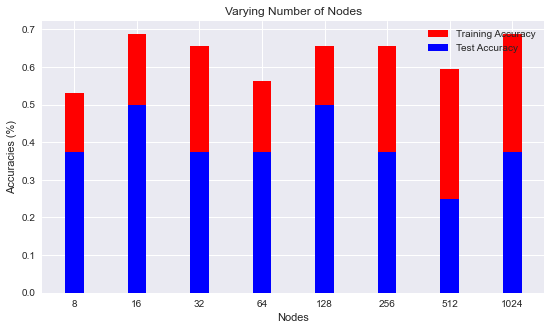

In [703]:
plt.xlabel('Nodes')
plt.ylabel('Accuracies (%)')
width=0.3
plt.bar(nodes,trainaccnodes,width=width,color='red',label="Training Accuracy")
plt.bar(nodes,testaccnodes,width=width,color='blue',label="Test Accuracy")
plt.legend(loc='best')
plt.title("Varying Number of Nodes")
plt.show()

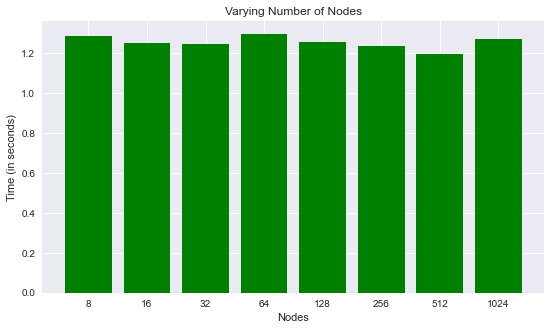

In [704]:
plt.xlabel('Nodes')
plt.ylabel('Time (in seconds)')
plt.bar(nodes,timesnodes,color='green')
plt.title("Varying Number of Nodes")
plt.show()

Text(0.5, 1.0, 'Varying Number of Layers')

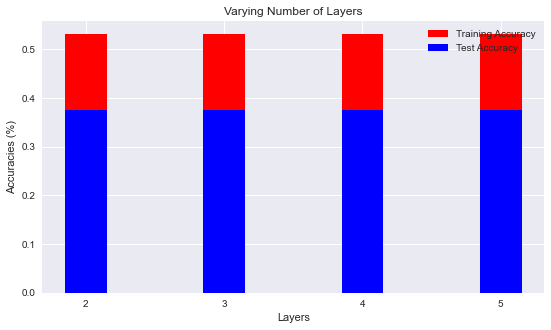

In [705]:
plt.xlabel('Layers')
plt.ylabel('Accuracies (%)')
width=0.3
plt.bar(layers,trainacclayers,width=width,color='red',label="Training Accuracy")
plt.bar(layers,testacclayers,width=width,color='blue',label="Test Accuracy")
plt.legend(loc='best')
plt.title("Varying Number of Layers")


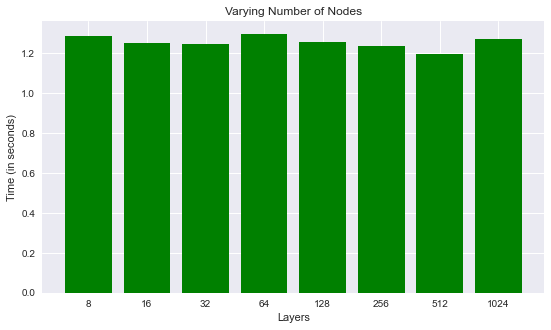

In [706]:
plt.xlabel('Layers')
plt.ylabel('Time (in seconds)')
plt.bar(nodes,timesnodes,color='green')
plt.title("Varying Number of Nodes")
plt.show()